#### Daniel Pickett

#### 05/17/2022

In [165]:
import pandas as pd
import numpy as np

#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
import torch
import torchvision
import torchvision.transforms as transforms

#### 1. Prepare Data

In [166]:
#https://www.kaggle.com/competitions/digit-recognizer/data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [167]:
df_train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [179]:
y_train = df_train['label'].to_numpy()
X_train = df_train.drop('label', axis='columns').to_numpy()

X_train_tensors = torch.tensor(X_train)
X_train_tensors = torch.reshape(X_train_tensor, (42_000, 28, 28))

#### 1a. Standardize

In [180]:
print('pixel mean', np.round(np.mean(X_train), 3))
print('pixel std', np.round(np.std(X_train), 3))

pixel mean 33.409
pixel std 78.678


In [181]:
def standardize(arr : np.ndarray) -> np.ndarray:
    '''mean -> 0, std -> 1'''
    return (arr - np.mean(arr)) / np.std(arr)

In [182]:
X_train = standardize(X_train)
print('pixel mean', np.round(np.mean(X_train), 3))
print('pixel std', np.round(np.std(X_train), 3))

pixel mean 0.0
pixel std 1.0


#### 1b. Display

In [173]:
def imshow(img : torch.tensor) -> None:
    np_img = img.numpy()
    plt.imshow(np_img)
    plt.show()

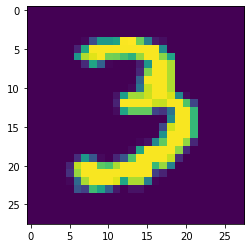

label: 3


In [193]:
imshow(X_train_tensors[9])
print('label:', y_train[9])

#### 1b. Split train, validation